In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt

The momentum strategy is a commonly used trading approach based on the belief that stocks that have performed well in the recent past will continue to do so in the future. It involves buying assets with strong positive performance and selling those with weak performance. This strategy can be implemented in long-only or long-short approaches.

During the RANKING PERIOD, typically 3 to 12 months, assets are evaluated based on their performance. The selected assets are then held in the portfolio for a specific duration, usually 1 to 12 months- HOLDING PERIOD. Rebalancing ensures the portfolio maintains its desired allocation and captures changing momentum.

Backtesting is the process of evaluating the strategy using historical market data. By defining the strategy's rules, selecting relevant data, simulating trades, and comparing results to benchmarks, its effectiveness can be assessed. 

I have chosen to test the momentum strategy on the S&P 500 index while considering the changes in added and removed stocks throughout the entire backtesting period.

In [2]:
#list of s&p 500 stocks
tickers= pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']
tickers_list= tickers.to_list()

#period of backtesting
start_date='2009-12-31'
end_date='2020-12-31'

# Added and Removed Stocks

In [3]:
#dataframe of added and removed stocks in the period
stocks_changes_df= pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1]
stocks_changes_df.columns = stocks_changes_df.columns.map('_'.join) #merge headers
stocks_changes_df.Date_Date = pd.to_datetime(stocks_changes_df.Date_Date)
stocks_changes_df=stocks_changes_df.set_index('Date_Date')
stocks_changes_df=stocks_changes_df[ (stocks_changes_df.index >= start_date) & (stocks_changes_df.index <= end_date)]
stocks_changes_df

,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason_Reason
Date_Date,,,,,
2020-12-21,TSLA,Tesla Inc,AIV,Apartment Investment & Management,Apartment Investment and Management (Aimco) sp...
2020-10-12,NaN,NaN,NBL,Noble Energy,Chevron acquired Noble Energy.[34]
2020-10-09,VNT,Vontier,NaN,NaN,S&P 500 constituent Fortive spun off Vontier.[34]
2020-10-07,POOL,Pool Corporation,ETFC,E-Trade,Morgan Stanley acquired E*Trade.[35]
2020-09-21,ETSY,Etsy,HRB,H&R Block,Market capitalization change.[36]
...,...,...,...,...,...
2010-07-14,CB,Chubb,MIL,Millipore,Acquired by Merck KGaA (MKGAY)[213]
2010-06-30,QEP,QEP Resources,STR,Questar,"Company split. QEP retained, but ticker change..."
2010-06-28,KMX,CarMax,XTO,XTO Energy,Acquired by ExxonMobil[215]


In [4]:
#series of added stocks in the period, and drop NaN
added= stocks_changes_df['Added_Ticker']
added= added.dropna()

#series of removed stocks in the period, and drop NaN
removed= stocks_changes_df['Removed_Ticker']
removed= removed.dropna()

In [5]:
#adding added tickers if not exists in the tickers_list
for value in added:
    if value not in tickers_list:
        tickers_list.append(value)

#adding removed tickers if not exists in the tickers_list
for value in removed:
    if value not in tickers_list:
        tickers_list.append(value)
        
#check and drop duplicates
if len(tickers_list) != len(set(tickers_list)):
    tickers_list = list(dict.fromkeys(tickers_list))

#len(tickers_list)

In [6]:
#create excel files
#added.to_excel(r'C:\Users\miris\OneDrive\שולחן העבודה\python\added.xlsx', sheet_name='Sheet1',  index=True)
#removed.to_excel(r'C:\Users\miris\OneDrive\שולחן העבודה\python\removed.xlsx', sheet_name='Sheet1',  index=True)

# DataFrame of Stocks Prices

In [7]:
#arrays for prices and symbols, each symbol's prices according to added date and removed date
prices, symbols= [],[]

#loop which append prices for each stock in the tickers list
for ticker in tickers_list:
    start= start_date
    end= end_date
    if not added.loc[added == ticker].index.empty:
        start= added.loc[added == ticker].index[0].strftime('%Y-%m-%d')
    if not removed.loc[removed == ticker].index.empty:
        end= removed.loc[removed == ticker].index[0].strftime('%Y-%m-%d')
    df=yf.download(ticker, start=start, end=end)['Adj Close']
    prices.append(df)
    symbols.append(ticker)

#concatenate all prices into one df
all_prices= pd.concat(prices, axis=1)

#names of columns
all_prices.columns= symbols


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NLSN: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KSU: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DLPH: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PETM: Data doesn't exist for startDate = 1349841600, endDate = 1426132800
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KRFT: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FTR: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LLTC: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SE: Data doesn't exist for startDate = 1262235600, endDate = 1488258000
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- STJ: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- S: Data doesn't exist for startDate = 1262235600, endDate = 1373256000
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- APOL: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DF: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CVH: Data doesn't exist for startDate = 1262235600, endDate = 1367985600
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PCS: No data found for this date range, symbol may be delisted
[********************

In [8]:
#drop columns with NaN in all values
all_prices = all_prices.dropna(axis=1, how='all')
all_prices

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,SVU,TLAB,WFR,ITT,RSH,MEE,AYE,ODP,NYT,SII
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,55.620792,NaN,19.169523,NaN,NaN,NaN,22.147493,36.779999,27.172192,NaN,...,80.074188,5.68,NaN,13.797474,NaN,0.450,NaN,56.536869,11.295527,NaN
2010-01-04,55.856258,NaN,19.336395,NaN,NaN,NaN,22.260666,37.090000,27.178547,NaN,...,81.649223,5.71,NaN,13.744770,NaN,0.467,NaN,56.536869,11.907824,NaN
2010-01-05,55.506393,NaN,19.180176,NaN,NaN,NaN,22.380913,37.700001,27.032600,NaN,...,80.263191,5.80,NaN,13.550594,35.000000,0.467,NaN,59.254150,12.300792,NaN
2010-01-06,56.293568,NaN,19.286686,NaN,NaN,NaN,22.324331,37.619999,26.969133,NaN,...,81.082222,5.94,NaN,13.464604,35.610001,0.468,NaN,57.939327,12.574954,NaN
2010-01-07,56.333954,NaN,19.446466,NaN,NaN,NaN,22.090904,36.889999,26.956440,NaN,...,81.271225,6.17,NaN,13.536719,36.790001,0.477,NaN,61.182533,12.977062,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,157.272995,52.686790,103.083862,93.107422,248.874924,89.244835,46.750671,496.910004,166.793945,149.515411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-24,157.752090,53.040524,103.947311,93.089386,248.739578,89.986816,46.835930,499.859985,168.098312,150.820129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,157.923828,53.174362,103.410065,93.260681,251.040390,90.451790,47.082237,498.950012,168.145920,149.055481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculation of Returns

I have chosen to test three momentum options to explore their effectiveness in generating superior returns.

Option 1 selects the top 10 stocks based on a 12-month ranking, held for 3 months. 

Option 2 selects the top 10 stocks based on a 6-month ranking, also held for 3 months.

Option 3 starts with the top 50 stocks from a 12-month ranking, narrows down to the top 30 based on a 6-month ranking, and finally selects the top 10 stocks from a 3-month ranking, As with the other options, holding period = 3 months.

In the end, I compare the returns of the three momentum options with the performance of the S&P 500 index, which serves as the benchmark. By comparing the returns, I can determine if the momentum options have outperformed or underperformed the S&P 500 index during the testing period.

In [9]:
#monthly returns from all_prices dataframe
all_prices = all_prices.set_index(pd.to_datetime(all_prices.index))
all_mtl_return= all_prices.pct_change().resample('M').agg(lambda x : (x+1).prod()-1)

#all_mtl_return.to_excel(r'C:\Users\miris\OneDrive\שולחן העבודה\python\all_mtl.xlsx', sheet_name='Sheet1',  index=True)

In [10]:
#date of the first momentum portfolio, 2010 year is just for ranking period
formation_date = dt.datetime(2010,12,31)

In [11]:
#A function which produce a dataframe with cumulative returns for n months
def cumulative_returns(n):
    cum_ret= (all_mtl_return+1).rolling(n).apply(np.prod)-1 
    return cum_ret.dropna(how='all').loc[formation_date:]

In [12]:
#dynamic function for momentum cumulative return in the whole period
#ranking is a parameter for ranking months and holding is a param for holding months, 
#n_largest is the number of assets in portfolio

def mom(all_mtl_return, ranking, holding, n_largest):
    all_mtl_return_ranking= cumulative_returns(ranking)
    all_mtl_return_holding= cumulative_returns(holding)
    
    rets=[]
    
    #for each row in ranking_df we take the top n_largest as winners and check their return after holding period
    for row in range(0, len(all_mtl_return_ranking)-holding, holding): #the step in range= holding period
        curr= all_mtl_return_ranking.iloc[row]
        winners= curr.nlargest(n_largest)
        win_ret= all_mtl_return_holding.loc[winners.name+ MonthEnd(holding), winners.index]
        rets.append(win_ret.mean())
        
    #return the cumulative return for the entire backtesting period
    return (pd.Series(rets)+1).prod()-1
        

In [13]:
#loop for check momentum profit based on the given ranking_months and 3-month holding period
for ranking in range(1,13):#1 month of ranking to 12 months
    print (mom(all_mtl_return, ranking, 3, 10))

2.106718110585028
3.58305979261488
3.9137522183329505
2.55119824732859
7.180761461734182
6.939429195335971
6.120679601934863
5.9156393534650595
5.869203839607798
4.804876109869607
4.75508455578411
6.130976792894439


In [14]:
#cumulutive return for s&p index in the entire period
sp=yf.download('^GSPC',start= formation_date, end= end_date)['Adj Close']
(sp.pct_change()+1).prod()-1

[*********************100%***********************]  1 of 1 completed


1.967494669057376

In [15]:
#dynamic function for momentum (non cumulative) return in the backtesting period
#ranking is a parameter for ranking months and holding is a param for holding months
#n_largest is the number of assets in portfolio
def momentum_strategy (ranking, holding, n_largest):
    all_mtl_return_ranking= cumulative_returns(ranking) #ranking return df 
    all_mtl_return_holding= cumulative_returns(holding) #holding return df
    
    rets=[]
    dates=[]
    
    #for each row in ranking_df we take the top n_largest as winners and check their return after holding period
    for row in range(0, len(all_mtl_return_ranking)-holding, holding): #the step in range= holding period
        curr= all_mtl_return_ranking.iloc[row]
        winners= curr.nlargest(n_largest)
        win_ret= all_mtl_return_holding.loc[winners.name+ MonthEnd(holding), winners.index]
        rets.append(win_ret.mean())
        dates.append(winners.name+ MonthEnd(holding))
        
    return pd.Series(rets, index=dates)

In [16]:
#create two dataframes, one based on 12 ranking months and the other based on 6 ranking months
#both of them 3 months of holding
ms12= momentum_strategy(12, 3, 10)
ms6= momentum_strategy(6, 3, 10)
#ms6
#ms12
#(ms6+1).prod()-1

In [17]:
#function for momentum (non cumulative) return in the backtesting period
#top 50 based on 12 months ranking, from these stocks top 30 based on 6 months ranking , 
#from these stocks top 10 based on 3 months ranking

all_mtl_return_12= cumulative_returns(12)
all_mtl_return_6= cumulative_returns(6)
all_mtl_return_3= cumulative_returns(3)

def momentum_strategy_top50 (holding):
    all_mtl_return_holding= cumulative_returns(holding)
    
    rets=[]
    dates=[]
    
    #for each row in 12_df we take the top 50 as winners -> then top 30 -> then top 10
    for row in range(0, len(all_mtl_return_12)-holding, holding): #the step in range= holding period
        curr= all_mtl_return_12.iloc[row]
        top_50= curr.nlargest(50).index
        top_30= all_mtl_return_6.loc[curr.name, top_50].nlargest(30).index
        top_10= all_mtl_return_3.loc[curr.name, top_30].nlargest(10)
        win_ret= all_mtl_return_holding.loc[top_10.name+ MonthEnd(holding), top_10.index]
        rets.append(win_ret.mean())
        dates.append(top_10.name+ MonthEnd(holding))
        
    return pd.Series(rets, index=dates)

In [18]:
#loop for checking profit of top 50->30->10 strategy in range of holding months between 1 to 12
for holding in range(1,13):
    ms_top= momentum_strategy_top50(holding)
    print( (ms_top+1).prod()-1)

6.2396301760676645
4.963246919001558
5.486570416224202
4.447911693220233
7.407881985622103
5.011084503551479
7.735587630841515
3.452298419118242
2.9979332132969763
7.1118711223661375
3.522710766748572
5.525252444213676


In [19]:
ms_top= momentum_strategy_top50(3)

In [20]:
#aggregate s&p 500 returns quaterly for comparison with the momentum returns
sp_ret= sp.pct_change().resample('3M').agg(lambda x : (x+1).prod()-1)[1:]
#sp_ret
#(sp_ret+1).prod()-1

In [21]:
#Create a DataFrame of 4 series- momentum_12 vs momentum_6 vs momentum_top vs sp
df_comparison = pd.DataFrame({'momentum_12': ms12, 'momentum_6': ms6, 'momentum_top': ms_top, 'sp': sp_ret})
df_comparison

,momentum_12,momentum_6,momentum_top,sp
2011-03-31,-0.066636,0.059258,0.047481,0.054221
2011-06-30,-0.039116,-0.049965,-0.035482,-0.003914
2011-09-30,-0.150208,-0.225597,-0.109798,-0.143279
2011-12-31,0.108997,0.068732,0.062831,0.111524
2012-03-31,0.072548,0.103303,0.123635,0.119967
2012-06-30,-0.010789,-0.040361,-0.055512,-0.032880
2012-09-30,0.100765,0.059968,0.064047,0.057636
2012-12-31,0.051951,0.090583,0.105755,-0.010051
2013-03-31,0.162555,0.147692,0.098525,0.100267
2013-06-30,-0.021258,0.052185,-0.028351,0.023636


<Axes: >

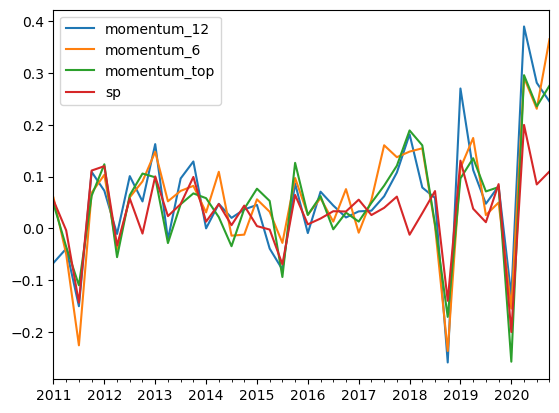

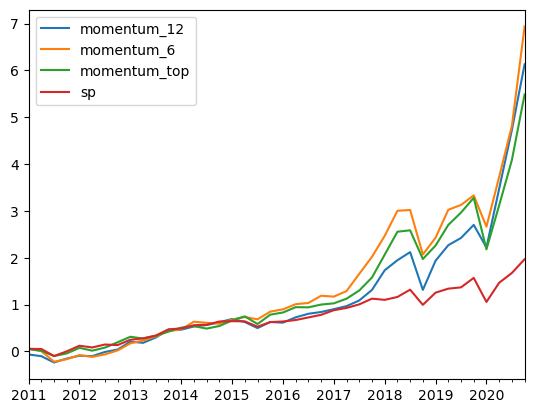

In [22]:
#line charts of momentum returns vs s&p 500
df_comparison.plot()
cumulative_returns = (1 + df_comparison).cumprod() - 1
cumulative_returns.plot()

In [23]:
cumulative_returns

,momentum_12,momentum_6,momentum_top,sp
2011-03-31,-0.066636,0.059258,0.047481,0.054221
2011-06-30,-0.103145,0.006333,0.010314,0.050094
2011-09-30,-0.237860,-0.220693,-0.100616,-0.100363
2011-12-31,-0.154789,-0.167130,-0.044107,-0.000032
2012-03-31,-0.093471,-0.081092,0.074075,0.119931
2012-06-30,-0.103251,-0.118180,0.014450,0.083108
2012-09-30,-0.012890,-0.065299,0.079423,0.145535
2012-12-31,0.038391,0.019369,0.193577,0.134021
2013-03-31,0.207186,0.169922,0.311174,0.247726
2013-06-30,0.181524,0.230975,0.274001,0.277218


In [24]:
describe= df_comparison.describe()
describe

,momentum_12,momentum_6,momentum_top,sp
count,40.000000,40.000000,40.000000,40.000000
mean,0.056776,0.059414,0.053304,0.030342
std,0.117699,0.114341,0.106237,0.074467
min,-0.258693,-0.236524,-0.257183,-0.200011
25%,-0.002272,0.010824,0.011870,0.005706
50%,0.049719,0.058786,0.060256,0.035474
75%,0.102480,0.110955,0.100332,0.066391
max,0.389422,0.364947,0.295506,0.199529


In [25]:
describe.loc['mean'].div(describe.loc['std'])

momentum_12     0.482385
momentum_6      0.519617
momentum_top    0.501744
sp              0.407459
dtype: float64